In [34]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

Завдання 0

In [2]:
customer_set = pd.read_csv("Mall_Customers.csv")

customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

Завдання 1

In [4]:
print(customer_set.head())
print("dimensionality of the dataset: ", customer_set.shape)
print(customer_set.describe())
print("Number of NaNs in each attribute:")
print(customer_set.isna().sum())

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40
dimensionality of the dataset:  (200, 5)
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
Number of NaNs in each attribute:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


Завдання 2

In [5]:
customer_set = customer_set.drop('CustomerID', axis=1)

Завдання 3

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(customer_set['Age'], bins=20, edgecolor='white')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(customer_set['Income'], bins=20, edgecolor='white')
plt.title('Distribution of Income')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(customer_set['SpendingScore'], bins=20, edgecolor='white')
plt.title('Distribution of Spending Score')
plt.grid(True)
plt.show()


Завдання 4

In [ ]:
sns.pairplot(customer_set, hue='Gender')
plt.show()

g = sns.PairGrid(customer_set, hue='Gender')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
plt.show()

 Більшість клієнтів є молодшими за віком, з розподілу доходів видно, що середній дохід клієнтів є високим. У вибірці переважають жінки, проте Pairplot показує схожість у розподілах доходів та витрат між чоловіками та жінками. Також в  "income - spendingScore" є кілька кластерів, тобто існує декілька різних груп за показниками доходів та витрат.

Завдання 5

In [ ]:
gender_amount = customer_set['Gender'].value_counts()
print("Gender ratio:")
print(gender_amount)
print()

plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=customer_set)
plt.title('Countplot by gender')
plt.show()

plt.figure(figsize=(6, 6))
customer_set['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution by gender')
plt.show()

Завдання 6

In [ ]:
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', kde=True)
plt.title('Histogram of Age by Gender (multiple=dodge)')
plt.show()

sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', kde=True)
plt.title('Histogram of Age by Gender (multiple=layer)')
plt.show()

sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', kde=True)
plt.title('Histogram of Annual Income by Gender (multiple=dodge)')
plt.show()

sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', kde=True)
plt.title('Histogram of Annual Income by Gender (multiple=layer)')
plt.show()


Завдання 7

In [ ]:
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', kde=True)
plt.title('Histogram of SpendingScore by Gender (multiple=dodge)')
plt.show()

sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', kde=True)
plt.title('Histogram of SpendingScore by Gender (multiple=layer)')
plt.show()

Завдання 8

In [ ]:
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set)
plt.title('Boxplot of Spending Score by Gender')
plt.show()

1. Із проведеного аналізу випливає, що кількість жінок у дослідженні переважає кількість чоловіків з розподілом 56% проти 44%.

2. На основі створених діаграм можна виділити три категорії доходів: низький, середній та високий. Жінки зазвичай мають або низький, або високий доходи, тоді як у більшості чоловіків доходи варіюються в середньому діапазоні.

3. Загальні витрати серед жінок трохи перевищують витрати чоловіків.
На основі аналізу boxplot діаграми за змінною SpendingScore можна зробити висновок, що витрати чоловіків коливаються між 25-70%, в той час як у жінок цей показник варіюється від 35% до 75%.

Завдання 9

In [ ]:
X = customer_set.drop(['Gender'], axis=1)

clusters = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=12)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()


Після аналізу даних за допомогою методу elbow  здається, що присутня 4 кластери, тобто оптимальна кількість - 4.

Завдання 10

In [ ]:
X = customer_set[['Income', 'SpendingScore']]

n_clusters = [2, 4]

for i, n in enumerate(n_clusters, start=1):
    kmeans = KMeans(n_clusters=n, random_state=12)
    kmeans.fit(X)
    customer_set[f'Cluster_{n}'] = kmeans.labels_

    sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=f'Cluster_{n}', palette='viridis', legend='full')
    plt.title(f'K-Means Clustering with {n} Clusters')
    plt.show()


Завдання 11

In [ ]:
X = customer_set[['Income', 'SpendingScore']]

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=12)
pred_y = kmeans.fit_predict(X)
df_clustered = pd.concat([X, pd.Series(pred_y, name='Cluster')], axis=1)

fig = px.scatter_3d(df_clustered, x='Income', y='SpendingScore', z='Cluster',
                    color='Cluster', symbol='Cluster', opacity=0.8,
                    size_max=10, width=800, height=600)
fig.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=12)
pred_y = kmeans.fit_predict(X)
df_clustered = pd.concat([X, pd.Series(pred_y, name='Cluster')], axis=1)

fig = px.scatter_3d(df_clustered, x='Income', y='SpendingScore', z='Cluster',
                    color='Cluster', symbol='Cluster', opacity=0.8,
                    size_max=10, width=800, height=600)
fig.show()


1. Були створені двовимірні візуалізації методом KMeans з двома та чотирма кластерами.
2. Аналізуючи візуалізацію з двома кластерами, спостерігається потенціал для чотирьох кластерів. Візуалізація з чотирма кластерами показує можливість виділити ще один кластер, тобто 5 може бути вибрано як підходящий варіант.
3. Використовуючи метод KMeans, була створена тривимірна візуалізація за допомогою scatter_3d. З огляду на візуалізації, кількість кластерів у діапазоні 5-6 здається оптимальною.

Завдання 12

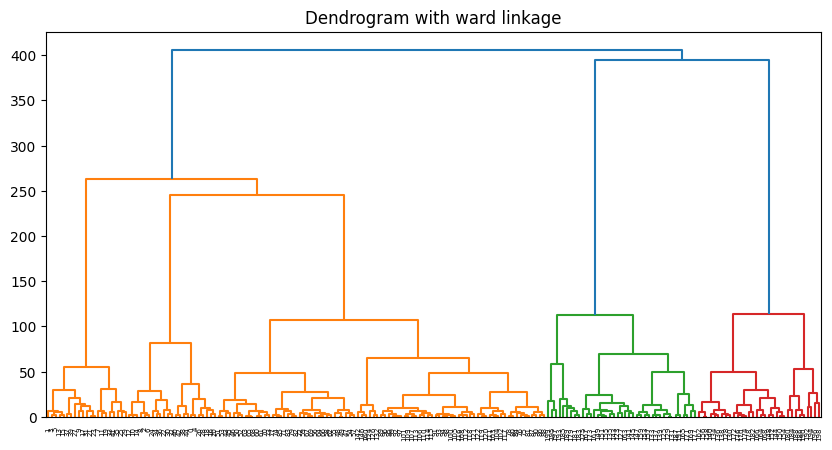

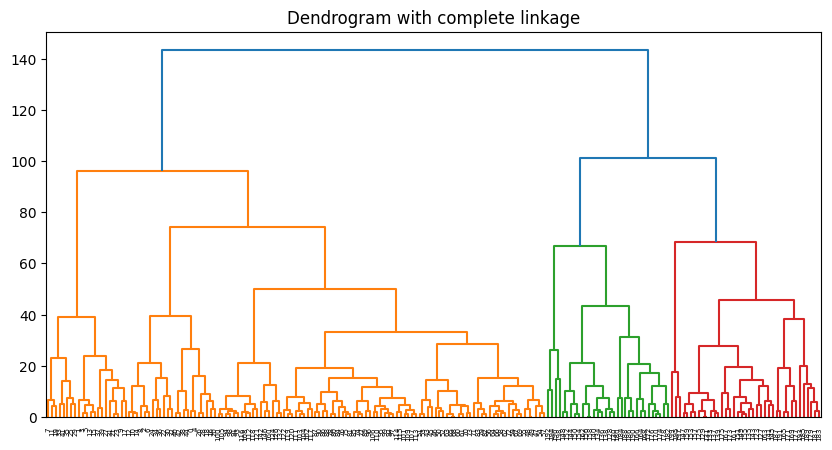

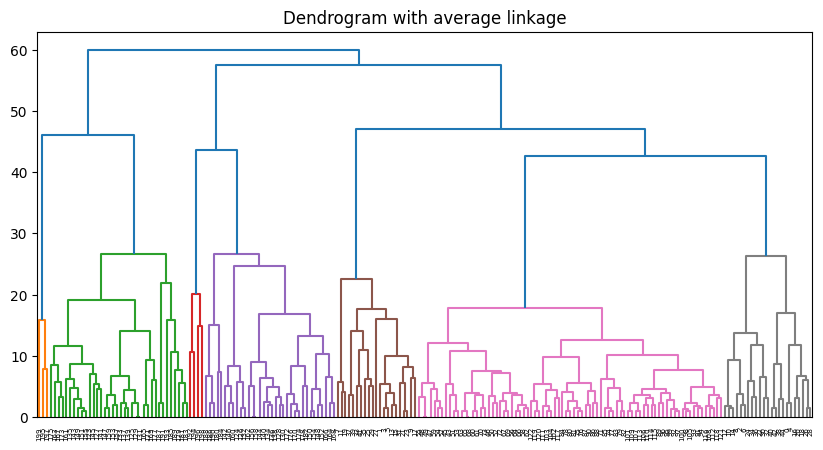

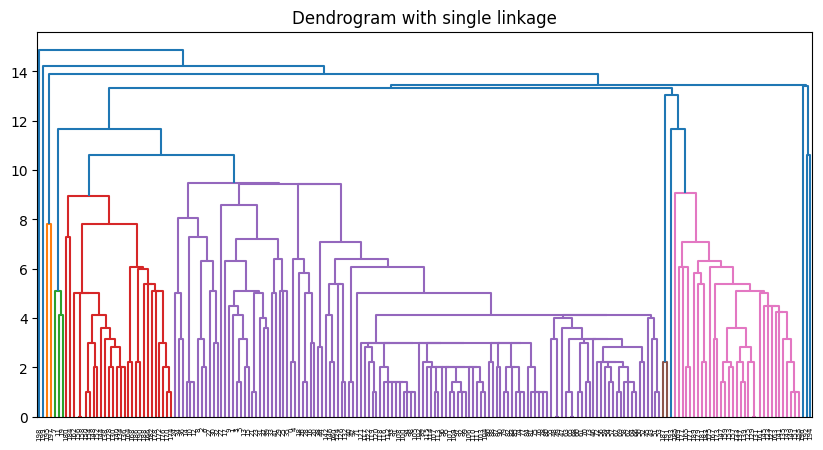

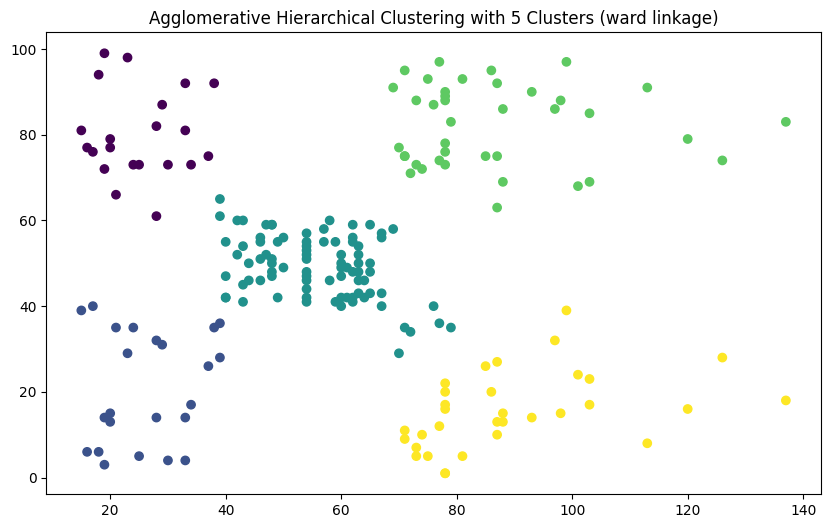

In [42]:
X = customer_set[['Income', 'SpendingScore']]
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    Z = hierarchy.linkage(X, method=method)

    plt.figure(figsize=(10, 5))
    hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram with {method} linkage')
    plt.show()

optimal_linkage = 'ward'
n_clusters = 5
Z = hierarchy.linkage(X, method=optimal_linkage)
clusters = hierarchy.fcluster(Z, n_clusters, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title(f'Agglomerative Hierarchical Clustering with {n_clusters} Clusters ({optimal_linkage} linkage)')
plt.show()

З аналізу графіку розсіювання можна зробити висновок, що споживачі формують різні кластери в залежності від рівня доходу та витрат.

З графіку дендрограми видно, що з кожним злиттям кластерів значення інерції зменшується, проте зниження інерції стає менш помітним після 5 кластерів. Це дає підставу припускати, що оптимальна кількість кластерів для подальшого кластерування даних дорівнює 5.

Завдання 13

In [ ]:
X = customer_set[['Income', 'SpendingScore']]

linkage_methods = ['ward', 'complete', 'average', 'single']

n_clusters = 5

for method in linkage_methods:
    Z = hierarchy.linkage(X, method=method)
    clusters = hierarchy.fcluster(Z, n_clusters, criterion='maxclust')

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Agglomerative Hierarchical Clustering with {n_clusters} Clusters ({method} linkage)')
    plt.show()

Для остаточних візуалізацій було використано п'ять кластерів, і було проведено порівняльний аналіз результатів кластеризації, отриманих розглянутими методами. У оьох випадках результати хороші, але метод KMeans показав трохи краще розподілення точок, ніж агломеративне кластерування, що дозволяє легше визначити свої цільові групи.